In [ ]:
!pip3 install rdkit-pypi

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

In [2]:
compounds_df = pd.read_csv (r'compounds.csv', sep=';')
compounds_smiles = compounds_df['smiles']
compounds_name = compounds_df['name']
reference_compound = 'C1=CC(=C(C=C1CC(C(=O)O)N)O)O'

Reference molecule


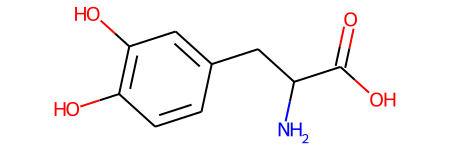

In [3]:
molecules = [Chem.MolFromSmiles(x) for x in compounds_smiles]
ref_mol = Chem.MolFromSmiles(reference_compound)
print('Reference molecule')
ref_mol

Molecules to compare


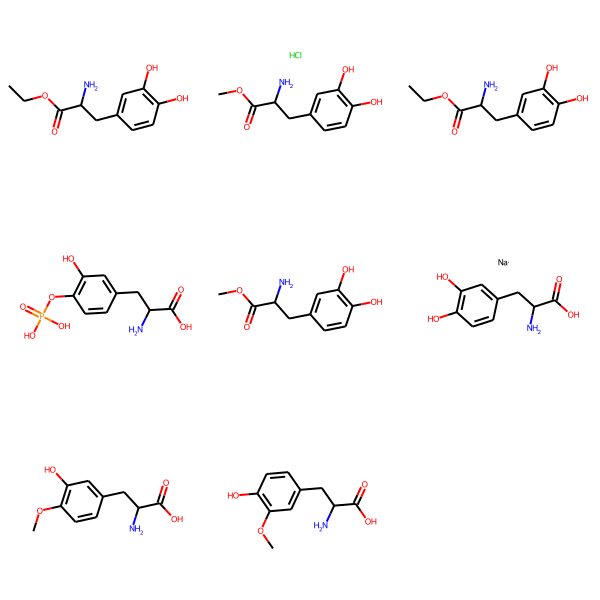

In [4]:
print('Molecules to compare')
Draw.MolsToGridImage(molecules)

In [5]:
fingerprints = [FingerprintMols.FingerprintMol(x) for x in molecules]
ref_fp = FingerprintMols.FingerprintMol(ref_mol)

In [6]:
tan,dice, cos, sokal  = [], [], [], []
for n in range(len(fingerprints)):
    s = DataStructs.TanimotoSimilarity(ref_fp, fingerprints[n])
    s1 = DataStructs.FingerprintSimilarity(ref_fp,fingerprints[n], metric=DataStructs.DiceSimilarity)
    s2 = DataStructs.FingerprintSimilarity(ref_fp,fingerprints[n], metric=DataStructs.CosineSimilarity)
    s3 = DataStructs.FingerprintSimilarity(ref_fp,fingerprints[n], metric=DataStructs.SokalSimilarity)
    tan.append(s)
    dice.append(s1)
    cos.append(s2)
    sokal.append(s3)

In [7]:
reference_smiles = [reference_compound]*len(compounds_smiles)
reference_name = ['LEVODOPA']*len(compounds_smiles)
d = {'compound_name':compounds_name,'query_smiles':compounds_smiles, 'reference_smiles':reference_smiles, 'reference_name':reference_name,'Tanimoto_similarity':tan, 'Dice_similarity':dice, 'Cosine_similarity':cos, 'Sokal_similarity':sokal}
df_final = pd.DataFrame(data=d)
df_final = df_final.sort_values('Tanimoto_similarity', ascending=False)
print(df_final)

#df_final.to_csv('results.csv', index=False, sep=',')

                                       compound_name  \
5                                    L-DOPA (sodium)   
1  (S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...   
4                                         Melevodopa   
6                      Tyrosine, 3-hydroxy-O-methyl-   
7                                  3-Methoxytyrosine   
0    Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate   
2                                        Etilevodopa   
3                                        Foslevodopa   

                            query_smiles              reference_smiles  \
5      C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na]  C1=CC(=C(C=C1CC(C(=O)O)N)O)O   
1       COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl  C1=CC(=C(C=C1CC(C(=O)O)N)O)O   
4          COC(=O)C(CC1=CC(=C(C=C1)O)O)N  C1=CC(=C(C=C1CC(C(=O)O)N)O)O   
6          COC1=C(C=C(C=C1)CC(C(=O)O)N)O  C1=CC(=C(C=C1CC(C(=O)O)N)O)O   
7          COC1=C(C=CC(=C1)CC(C(=O)O)N)O  C1=CC(=C(C=C1CC(C(=O)O)N)O)O   
0         CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N  C1=CC(=C(

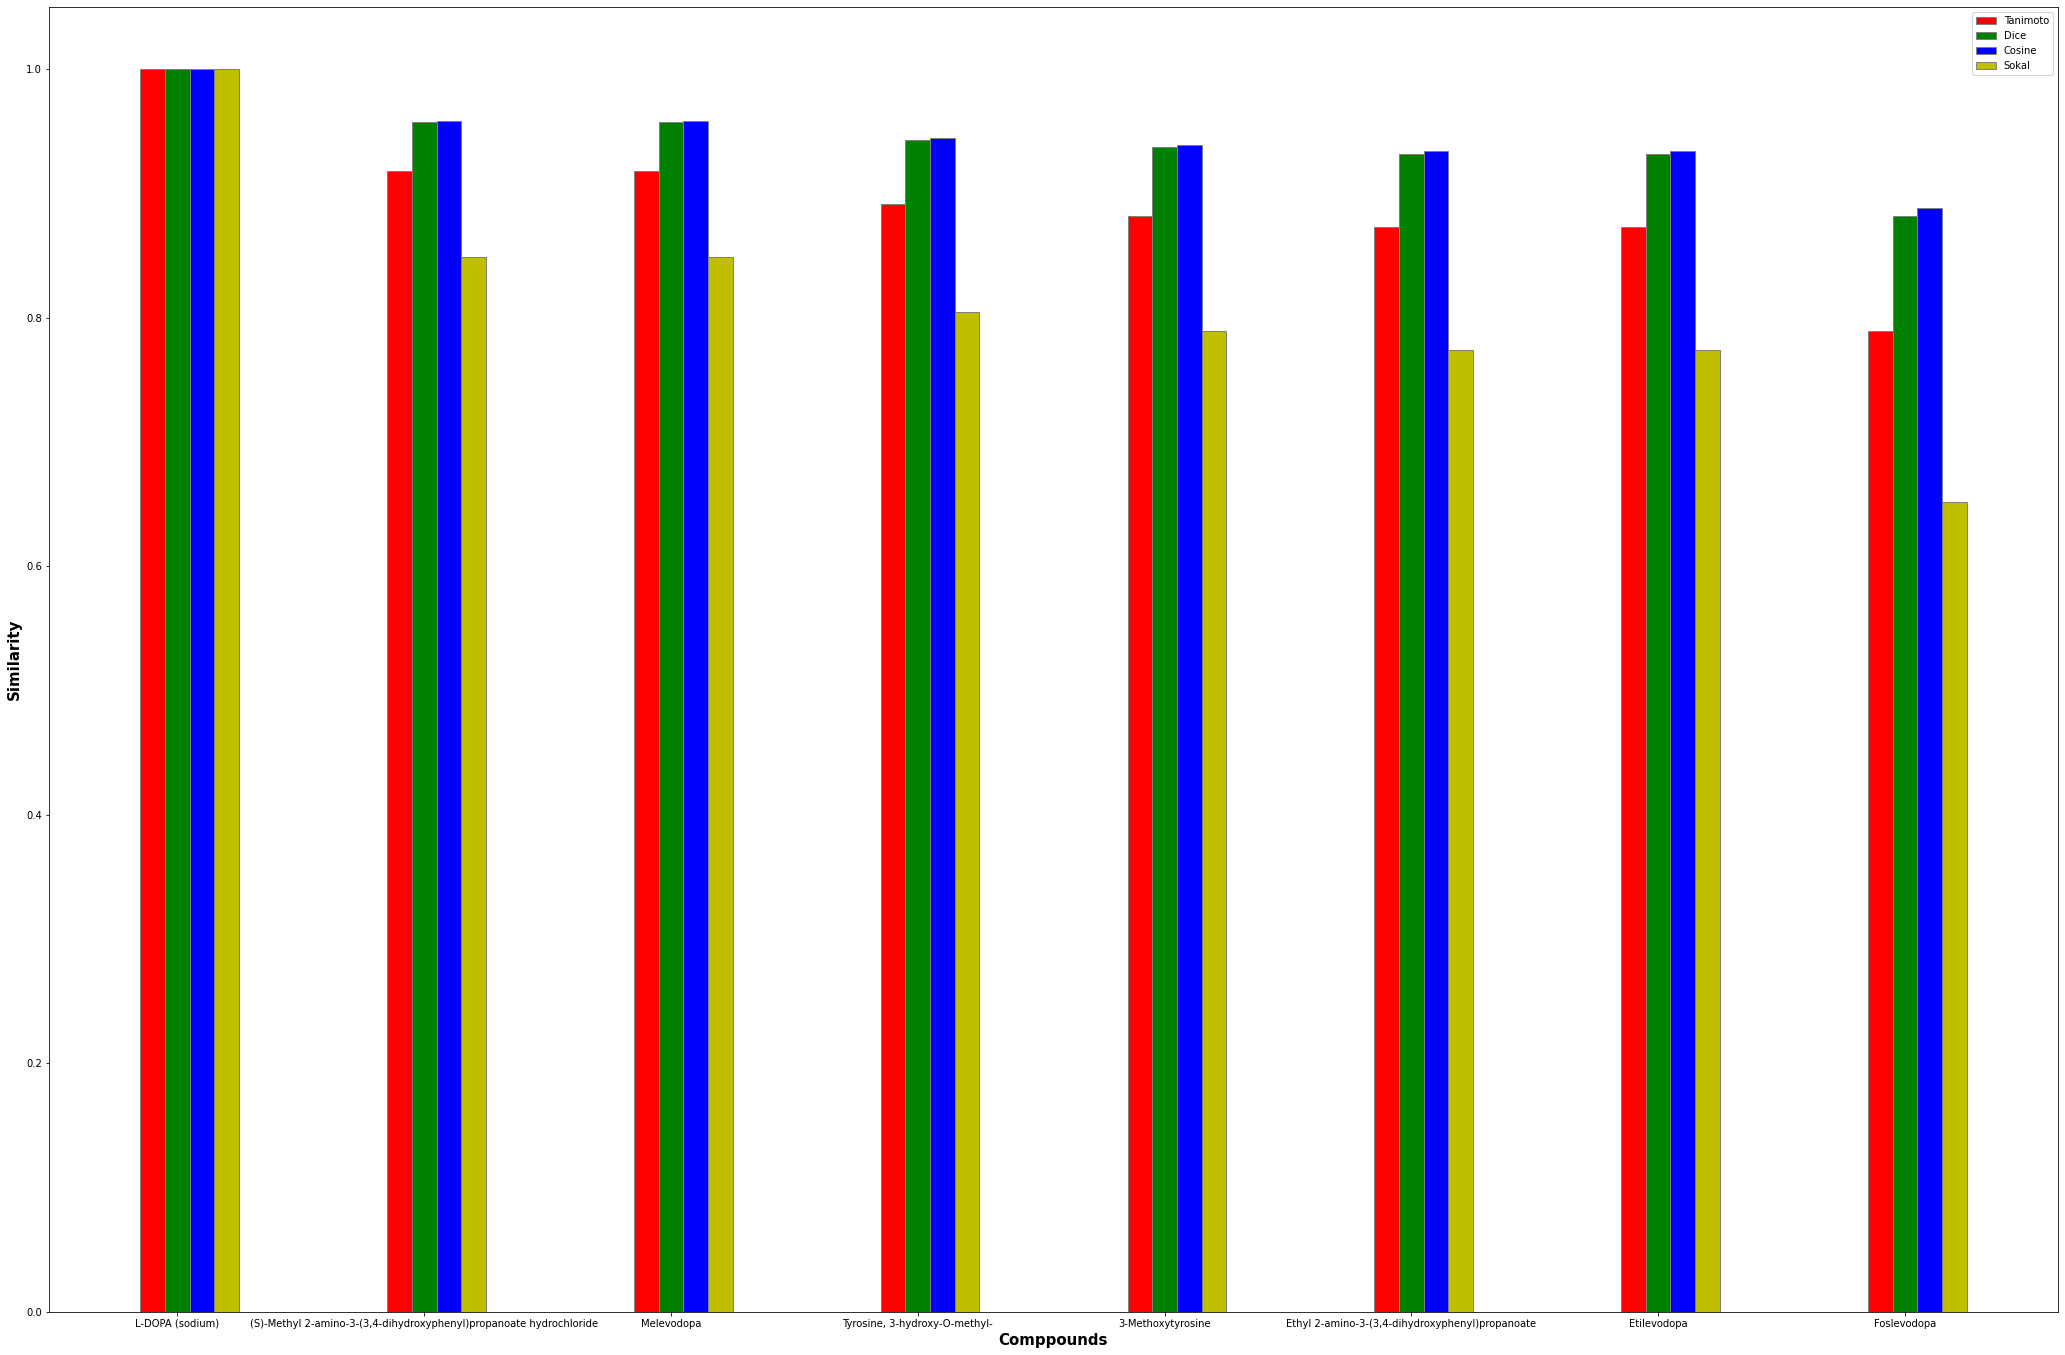

In [8]:
import numpy as np
import matplotlib.pyplot as plt
 
barWidth = 0.1
fig = plt.subplots(figsize =(36, 24))
 
# set height of bar
T = df_final['Tanimoto_similarity']
D = df_final['Dice_similarity']
C = df_final['Cosine_similarity']
S = df_final['Sokal_similarity']
 
# Set position of bar on X axis
br1 = np.arange(len(T))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, T, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tanimoto')
plt.bar(br2, D, color ='g', width = barWidth,
        edgecolor ='grey', label ='Dice')
plt.bar(br3, C, color ='b', width = barWidth,
        edgecolor ='grey', label ='Cosine')
plt.bar(br4, S, color ='y', width = barWidth,
        edgecolor ='grey', label ='Sokal')
 
# Adding Xticks
plt.xlabel('Comppounds', fontweight ='bold', fontsize = 15)
plt.ylabel('Similarity', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(T))],
        df_final['compound_name'])
 
plt.legend()
plt.show()